<a href="https://colab.research.google.com/github/talshemtov/quality1/blob/master/colab_Recsys-01.05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW1

1 - Data Analysis
(we analysed all rating not only training)

**a - Average Ratings**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [0]:
# read data into dataframe
# MOVIELENS_DIR = "C:\\Users\\talshemt\\PycharmProjects\\HW_Recsys\\ml-100k"
MOVIELENS_DIR=''
RATING_DATA_FILE = "../u.data"
ratings = pd.read_csv(MOVIELENS_DIR+RATING_DATA_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

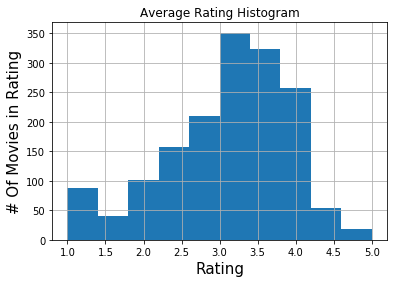

In [5]:
# get average rating for each movie and print histogram
average_rating=ratings.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating.sort_values('rating', inplace=True, ascending=False)
fig = average_rating.hist(column="rating")
plt.title("Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)

In [8]:
# print top 3 movies
average_rating.head(3)

,rating
movieid,
1306,5.0
1358,5.0
1500,5.0


**b - Gender Analysis**

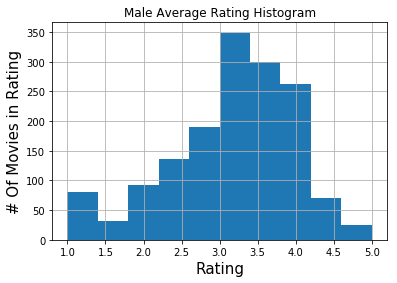

Top 3 movies by males:


,rating
movieid,
1144,5.0
1189,5.0
1536,5.0


In [9]:
# add column gender to ratings
USERS_DATA_FILE = "../u.user"
users = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'age' , 'gender' , 'occupation' , 'zip code'])
merged_users_movies=pd.merge(ratings,users)

#Male Analysis
rating_male=merged_users_movies.loc[merged_users_movies['gender'] == 'M']
average_rating_male = rating_male.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_male.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_male.hist(column="rating")
plt.title("Male Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by males:")
average_rating_male.head(3)


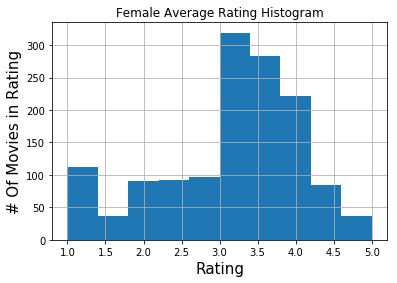

Top 3 movies by females:


,rating
movieid,
1599,5.0
1368,5.0
247,5.0


In [10]:

#Female Analysis
rating_female=merged_users_movies.loc[merged_users_movies['gender'] == 'F']
average_rating_female = rating_female.filter(['movieid','rating']).groupby('movieid').mean()
# sort by rating
average_rating_female.sort_values('rating', inplace=True, ascending=False)
fig = average_rating_female.hist(column="rating")
plt.title("Female Average Rating Histogram")
plt.xlabel("Rating", fontsize=15)
plt.ylabel("# Of Movies in Rating", fontsize=15)
plt.show(fig)
print("Top 3 movies by females:")
average_rating_female.head(3)

In [11]:
# get average difference between genders
average_rating_male.rename(columns = {'rating':'male_rating'}, inplace = True)
average_rating_female.rename(columns = {'rating':'female_rating'}, inplace = True)
merged_users_averages=pd.merge(average_rating_male,average_rating_female,left_index=True,right_index=True,how='outer')
# remove NAN
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['female_rating'])]
merged_users_averages=merged_users_averages[np.isfinite(merged_users_averages['male_rating'])]
# get difference
difference_between_genders=merged_users_averages.apply(lambda row: (abs(row['male_rating']-row['female_rating'])), axis=1)
difference_between_genders_df = pd.DataFrame({'movieid':difference_between_genders.index, 'difference':difference_between_genders.values})
# get average difference between genders
print('Average of differences between male and female ratings: ')
print(difference_between_genders_df['difference'].mean())

# get top 5 movies with largest difference
    #sort ascending:
difference_between_genders_df.sort_values('difference', inplace=True, ascending=False)
    #print top 5
print('Top 5 movies with the greatest difference in ratings between genders: ')
difference_between_genders_df.head(5)

Average of differences between male and female ratings: 
0.5921530494755101
Top 5 movies with the greatest difference in ratings between genders: 


,movieid,difference
241,247,4.0
972,1026,4.0
1305,1592,4.0
817,851,4.0
1180,1275,4.0


**c - Genre Analysis**

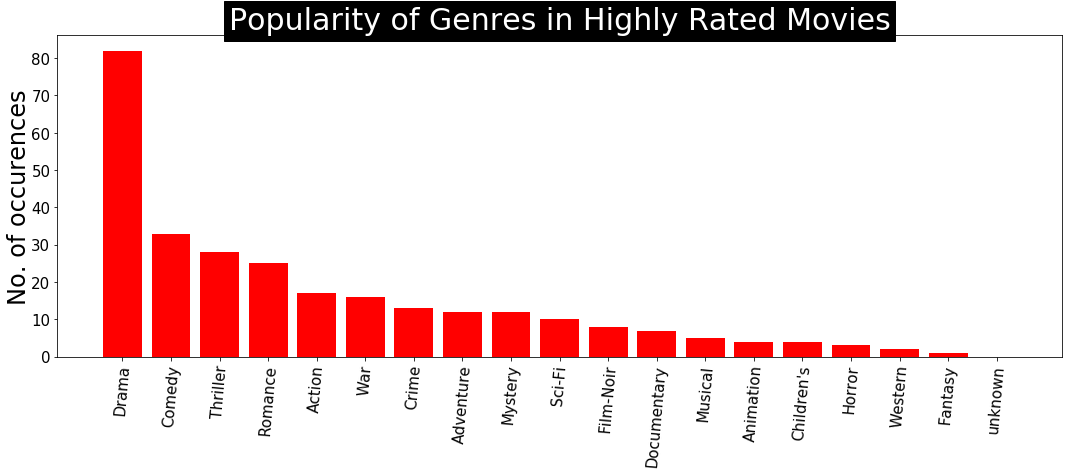

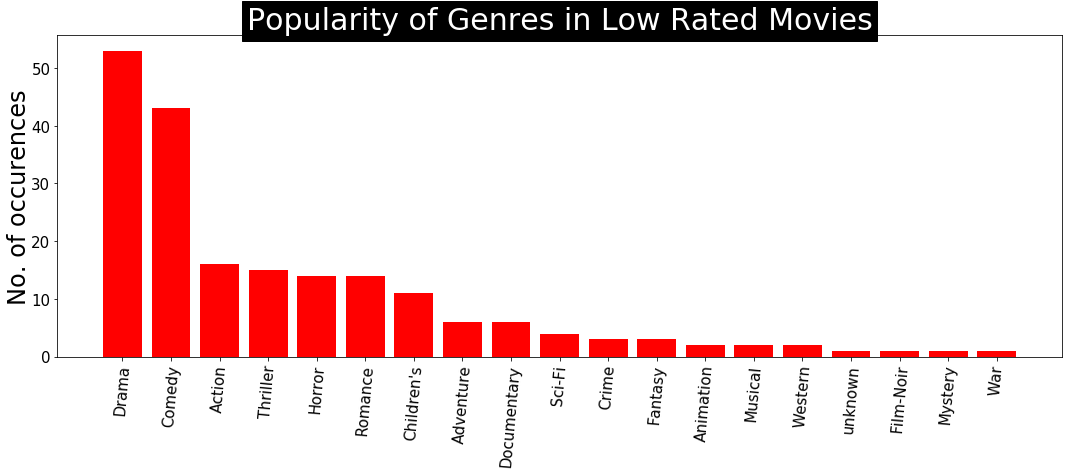

In [12]:
# add column genre to ratings
# read movie info with genre data
USERS_DATA_FILE = "../u.item"
genre = pd.read_csv(MOVIELENS_DIR+USERS_DATA_FILE, 
                    sep='|', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movieid', 'movie title', 'release date', 'video release date',
              'IMDb URL',  'unknown',  'Action',  'Adventure',  'Animation',
              'Children\'s', 'Comedy',  'Crime', 'Documentary', 'Drama',  'Fantasy', 'Film-Noir','Horror','Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'])

# merge movie info with movie ratings and user data and sort by rating
merged_average_rating_genre=pd.merge(average_rating,genre, left_index=True,right_on='movieid', how='outer')

# Analyze genre distribution for high rated movies (rating bigger than 4):
high_rated_indexes = merged_average_rating_genre['rating']>4.0
high_rated = merged_average_rating_genre[high_rated_indexes]

# Count high-rated movies per genre
genres = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for g in genres:
    count = 0
    genre_movies = high_rated[g] == 1
    genres_count[g] = high_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Highly Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = merged_average_rating_genre['rating']<2.0
low_rated = merged_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


Genre Distribution Analysis for Demographic Details

Gender Based

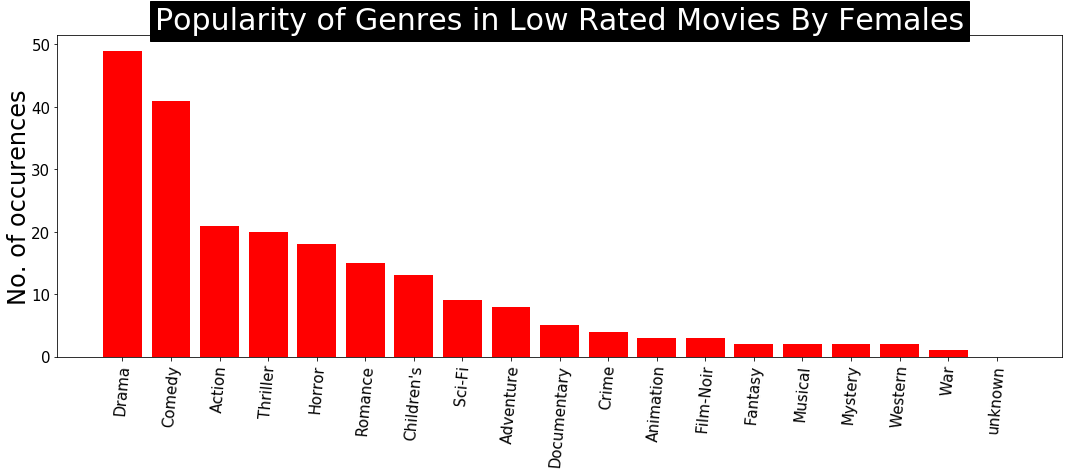

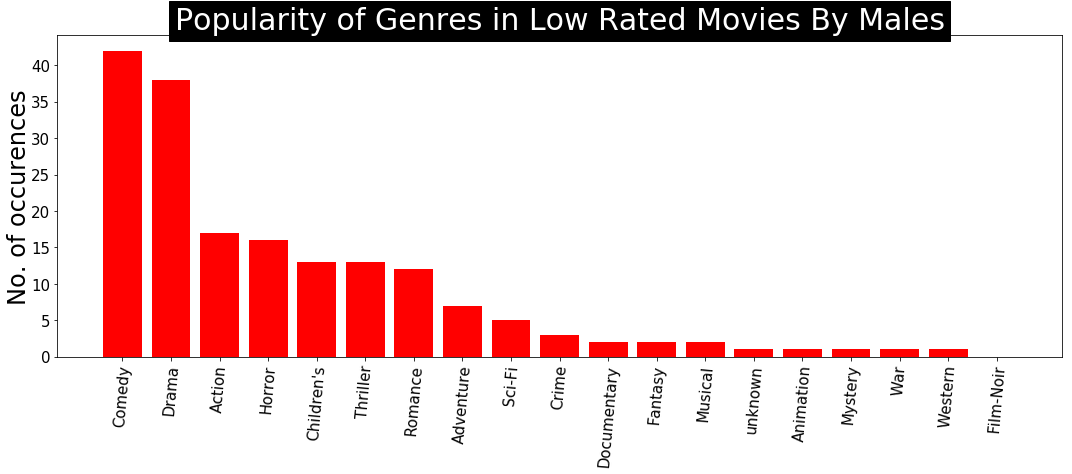

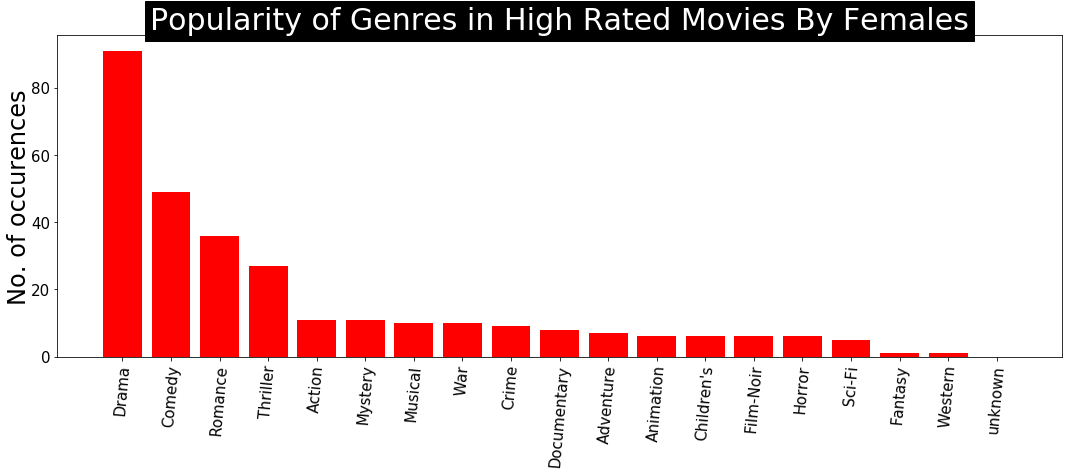

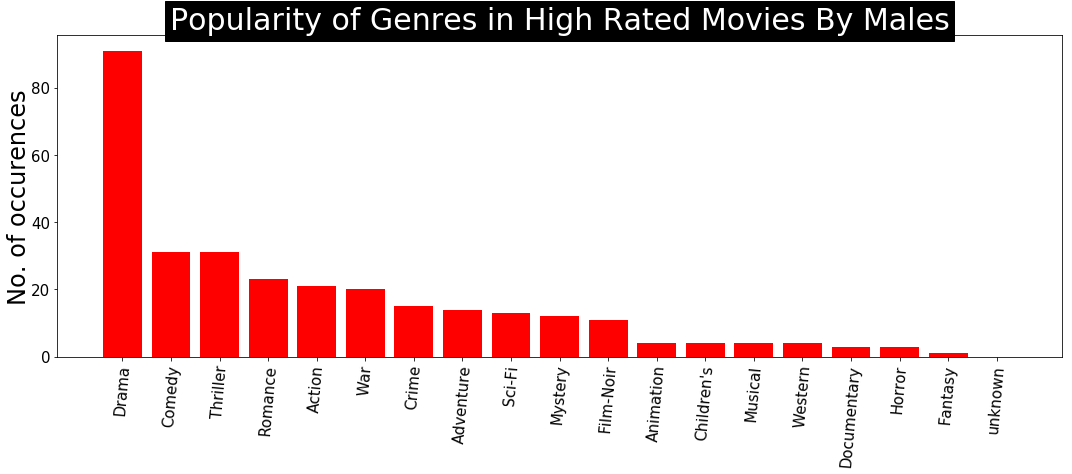

In [13]:
#Female + Low Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = female_average_rating_genre['female_rating']<2.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + Low Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating below 2):
low_rated_indexes = male_average_rating_genre['male_rating']<2.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in Low Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Female + High Rating
female_average_rating_genre=pd.merge(average_rating_female,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = female_average_rating_genre['female_rating']>4.0
low_rated = female_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig1 = plt.figure(1, figsize=(18,13))
ax2 = fig1.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Females",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

#Male + High Rating
male_average_rating_genre=pd.merge(average_rating_male,genre, left_index=True,right_on='movieid', how='inner')

# Analyze genre distribution for low rated movies (rating above 4):
low_rated_indexes = male_average_rating_genre['male_rating']>4.0
low_rated = male_average_rating_genre[low_rated_indexes]

# Count high-rated movies per genre
genres_count = {}
for g in genres:
    count = 0
    genre_movies = low_rated[g] == 1
    genres_count[g] = low_rated[genre_movies].shape[0]
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)

#Display genre count distribution for highly rated movies:
fig2 = plt.figure(1, figsize=(18,13))
ax2 = fig2.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres in High Rated Movies By Males",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

Conclusions:


*   We can see that the top two genres are: Drama and Comedy for both genders (but more females liked Comedy than men)
*   Some of the genre are similar between the genders but some have differences. For example: Musical is rated as the 7th most popular genre for females, whereas for man it the 14th most popular genre.
* In addition - we can see from the "Low Rated" histograms that the most seen genres are similar to those with high rating in both genders, meaning that they are the most viewed genre in general.



**d - Most popular movies.**

The popularity will be calculated by:
1. We will find the movies that their number of ratings is above the average.
2. From the movies we found we will find the top 20 movies that have the highest average rating.

In [14]:
# Count ratings per movie
count_rating_per_movie = ratings['movieid'].value_counts()
count_rating_per_movie_df = pd.DataFrame({'movieid':count_rating_per_movie.index, 'frequency':count_rating_per_movie.values})

#Merge with average rating:
count_with_rating = pd.merge(average_rating, count_rating_per_movie_df, left_index=True, right_on='movieid', how='inner')

#Get average frequency
avg_freq = count_with_rating['frequency'].mean()

#Get movies with frequency over average frequency
high_freq_indexes = count_with_rating['frequency']>avg_freq
high_freq = count_with_rating[high_freq_indexes]

#Get movies with highest rating within movies with high rating frequency
high_freq.sort_values('rating', inplace=True, ascending=False)

#Get top 20
print('Top 20 most popular movies:')
high_freq.head(20)

Top 20 most popular movies:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,rating,movieid,frequency
70,4.496183,483,131
460,4.461538,114,39
35,4.440252,64,159
337,4.415094,408,53
118,4.396226,603,106
36,4.373418,318,158
130,4.360000,272,100
44,4.344595,12,148
275,4.343750,169,64
283,4.338710,657,62


2 - Non-personal Recommendations



**a - Build and train a model based on linear regression**

In [15]:
#Read training data
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
RATING_TRAINING_FILE = "../u1.base"
RATING_TEST_FILE = "../u1.test"
ratings_training = pd.read_csv(MOVIELENS_DIR+RATING_TRAINING_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])
ratings_test = pd.read_csv(MOVIELENS_DIR+RATING_TEST_FILE, 
                    sep='\t', 
                    engine='python', 
                    encoding='latin-1',
                    names=['userid', 'movieid', 'rating', 'timestamp'])

avg_ratings_training = ratings_training.filter(['movieid','rating']).groupby('movieid').mean()
training = pd.merge(avg_ratings_training, genre, left_index=True, right_on='movieid', how='left')
training_X = training[training.columns[6:]]
training_Y = (training.rating).values

#create and train the model
regr = linear_model.LinearRegression()
regr.fit(training_X, training_Y)

#Evaluate the model with test set
avg_ratings_test = ratings_test.filter(['movieid','rating']).groupby('movieid').mean()
test = pd.merge(avg_ratings_test, genre, left_index=True, right_on='movieid', how='left')
test_X = test[test.columns[6:]]
test_Y = (test.rating).values
test_pred = regr.predict(test_X)

# MAE
print('MAE: \n')
print(mean_absolute_error(test_Y, test_pred))

MAE: 

0.7026804223720173


**b - Recommend 20 new movies for each user**

In [0]:
#TODO

**c - repeat a, b for different genders**

Linear regression prediction (a)

In [31]:
# get only female train and test
ratings_training_f = pd.merge(ratings_training, rating_female, on=['movieid','userid', 'rating','timestamp'], how='right')
ratings_test_f = pd.merge(ratings_test, rating_female, on=['movieid','userid', 'rating','timestamp'], how='right')

avg_ratings_training_f = ratings_training_f.filter(['movieid','rating']).groupby('movieid').mean()
training_f = pd.merge(avg_ratings_training_f, genre, left_index=True, right_on='movieid', how='left')
training_X_f = training_f[training_f.columns[6:]]
training_Y_f = (training_f.rating).values

#create and train the model
regr_f = linear_model.LinearRegression()
regr_f.fit(training_X_f, training_Y_f)

#Evaluate the model with test set
avg_ratings_test_f = ratings_test_f.filter(['movieid','rating']).groupby('movieid').mean()
test_f = pd.merge(avg_ratings_test_f, genre, left_index=True, right_on='movieid', how='left')
test_X_f = test_f[test_f.columns[6:]]
test_Y_f = (test_f.rating).values
test_pred_f = regr_f.predict(test_X_f)

# MAE
print('Female based MAE:')
print(mean_absolute_error(test_Y_f, test_pred_f))

# get only male train and test
ratings_training_m = pd.merge(ratings_training, rating_male, on=['movieid','userid', 'rating','timestamp'], how='right')
ratings_test_m = pd.merge(ratings_test, rating_male, on=['movieid','userid', 'rating','timestamp'], how='right')

avg_ratings_training_m = ratings_training_m.filter(['movieid','rating']).groupby('movieid').mean()
training_m = pd.merge(avg_ratings_training_m, genre, left_index=True, right_on='movieid', how='left')
training_X_m = training_m[training_m.columns[6:]]
training_Y_m = (training_m.rating).values

#create and train the model
regr_m = linear_model.LinearRegression()
regr_m.fit(training_X_m, training_Y_m)

#Evaluate the model with test set
avg_ratings_test_m = ratings_test_m.filter(['movieid','rating']).groupby('movieid').mean()
test_m = pd.merge(avg_ratings_test_m, genre, left_index=True, right_on='movieid', how='left')
test_X_m = test_m[test_m.columns[6:]]
test_Y_m = (test_m.rating).values
test_pred_m = regr_m.predict(test_X_m)

# MAE
print('Male based MAE:')
print(mean_absolute_error(test_Y_m, test_pred_m))

Female based MAE:
0.7249415485424849
Male based MAE:
0.6218310461114487


Conclusion: As we can see the MAE for male is smaller than for females. This can be caused by the difference between the training set sizes (larger for males than for females) which can cause a less training model and overfitting.

TODO b for genders

3 - Personal Recommendations

**a - Build a model based on matrix factorization (item similarity and item content)**

In [0]:
!pip install turicreate
import turicreate as tc
from datetime import datetime

#Prepare data - remove rare data
# rare_items = ratings_training.groupby('movieid', tc.aggre)

prepeare the data - remove rare movies

In [0]:
# remove rare movies
rare_items = (tc.SFrame(ratings)).groupby('movieid', tc.aggregate.COUNT()).sort('Count')
rare_items = rare_items[rare_items['Count'] <= 5]

sframe_train = tc.SFrame.read_csv("../u1.base",sep='\t',header=False)
sframe_train = sframe_train.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})

train_non_rare=sframe_train.filter_by(rare_items['movieid'], 'movieid', exclude=True)
train_non_rare['timestamp'] = train_non_rare['timestamp'].astype(datetime)

sframe_test = tc.SFrame.read_csv("../u1.test",sep='\t',header=False)
sframe_test = sframe_test.rename({'X1': 'userid','X2':'movieid','X3':'rating','X4':'timestamp'})
test_non_rare=sframe_test.filter_by(rare_items['movieid'], 'movieid', exclude=True)
test_non_rare['timestamp'] = test_non_rare['timestamp'].astype(datetime)

# get movies name, year and genres
genre_temp=genre.drop(columns=['release date','video release date','IMDb URL'])
sframe_genre=tc.SFrame(genre_temp)
train_non_rare=train_non_rare.join(sframe_genre,how='left')
train_non_rare['year'] = train_non_rare['movie title'].apply(lambda x: x[-5:-1])
train_non_rare['movie title'] = train_non_rare['movie title'].apply(lambda x: x[:-7])
test_non_rare=test_non_rare.join(sframe_genre,how='left')
test_non_rare['year'] = test_non_rare['movie title'].apply(lambda x: x[-5:-1])
test_non_rare['movie title'] = test_non_rare['movie title'].apply(lambda x: x[:-7])

Create item similarity model

In [0]:
# create and train the model
item_sim_model = tc.recommender.item_similarity_recommender.create(train_non_rare.remove_column('timestamp'), 'userid', 'movieid', target='rating', item_data=sframe_genre)

Create item content model

In [0]:
# create and train the model
item_content_model = tc.recommender.item_content_recommender.create(item_data=sframe_genre,item_id='movieid',observation_data= train_non_rare.remove_column('timestamp'),user_id='userid', target='rating' )

**b - calculate MAE for previous models**

In [42]:
# predict for item similarity
item_sim_pred=item_sim_model.predict(test_non_rare)

# MAE
print('Item similarity model MAE:')
print(mean_absolute_error(test_non_rare['rating'], item_sim_pred))

# predict for item content
item_content_pred=item_content_model.predict(test_non_rare)

# MAE
print('Item content model MAE:')
print(mean_absolute_error(test_non_rare['rating'], item_content_pred))

Item similarity model MAE:
3.509010197848984
Item content model MAE:
3.3753082700690893


c - TODO: conclution

4 - neural collaborative filtering

**d - create model**

In [47]:
import tensorflow as T
import keras
from keras import backend as K
from keras import initializers
from keras.initializers import RandomNormal
from keras.models import Sequential, Model, load_model, save_model
from keras.layers.core import Dense, Lambda, Activation
from keras.layers import Embedding, Input, Dense, merge, Reshape,  Flatten, Dropout
from keras.optimizers import Adagrad, Adam, SGD, RMSprop, Adamax
from keras.regularizers import l2
from keras.layers import Multiply, Concatenate
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from time import time
import multiprocessing as mp
import sys
import math
import argparse
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [57]:
# create the model
# Input variables
user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

num_users=len(users)
num_items=len(genre)
MF_Embedding_User = Embedding(input_dim = num_users, output_dim = 1, name = 'user_embedding', input_length=1)
MF_Embedding_Item = Embedding(input_dim = num_items, output_dim = 1, name = 'item_embedding', input_length=1)

# Crucial to flatten an embedding vector!
user_latent = Flatten()(MF_Embedding_User(user_input))
item_latent = Flatten()(MF_Embedding_Item(item_input))

# Element-wise product of user and item embeddings
conc = Concatenate()([user_latent, item_latent])
drop = Dropout(0.5)(conc)
prediction = Dense(1, activation='relu', kernel_initializer='lecun_uniform', name = 'prediction')(drop)

NCF_model = Model(input=[user_input, item_input], output=prediction)
NCF_model.summary()

NCF_model.compile(loss='mse',optimizer=Adamax(lr=0.001),metrics=['mae'])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 1)         943         user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 1)         1682        item_input[0][0]                 
__________________________________________________________________________________________________
flatten_18

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


In [0]:
# TODO - FIT THE MODEL

# fit the model
# callbacks_ncf = [EarlyStopping('val_loss', patience=5), 
#              ModelCheckpoint(MODEL_WEIGHTS_FILE_CORE+'_ncf_'+str(do)+'_'+str(K_LATENT)+'_'+str(hidden_dim)+'.h5', save_best_only=True)]
history=NCF_model.fit([Users, Movies], Ratings, nb_epoch=100, validation_split=.1, verbose=1, callbacks=callbacks_ncf, batch_size = 32)

5

**a - suggest model**